# **Part A: Classification - Predicting Borough of NYC Airbnb Listing**

For the classification task, I will predict the borough of each Airbnb listing in NYC. The input variables (X) will include room type, price, number of reviews, availability, and other numerical features extracted from the dataset, with a minimum of 5 features considered. The target variable (Y) will represent the borough categories, with the goal of achieving classification accuracy above 60%. I will employ classification algorithms such as Naive Bayes, Decision Trees, Random Forests, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN) to develop the predictive model.

Step 1: Load Dataset

In [88]:
import pandas as pd

# Load the dataset
url = '/content/new_york_listings_2024.csv'
listings = pd.read_csv(url)

Step 2: Data Visualization

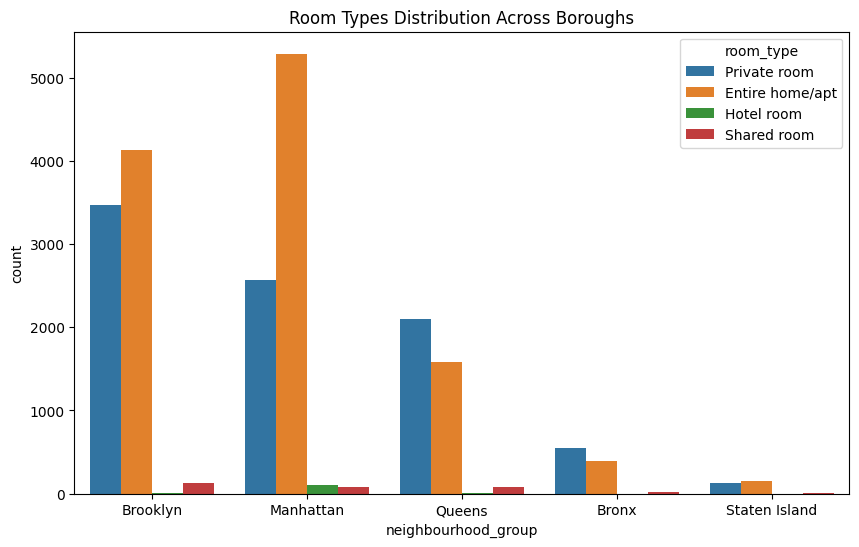

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of room types across different boroughs
plt.figure(figsize=(10, 6))
sns.countplot(data=listings, x='neighbourhood_group', hue='room_type')
plt.title('Room Types Distribution Across Boroughs')
plt.show()

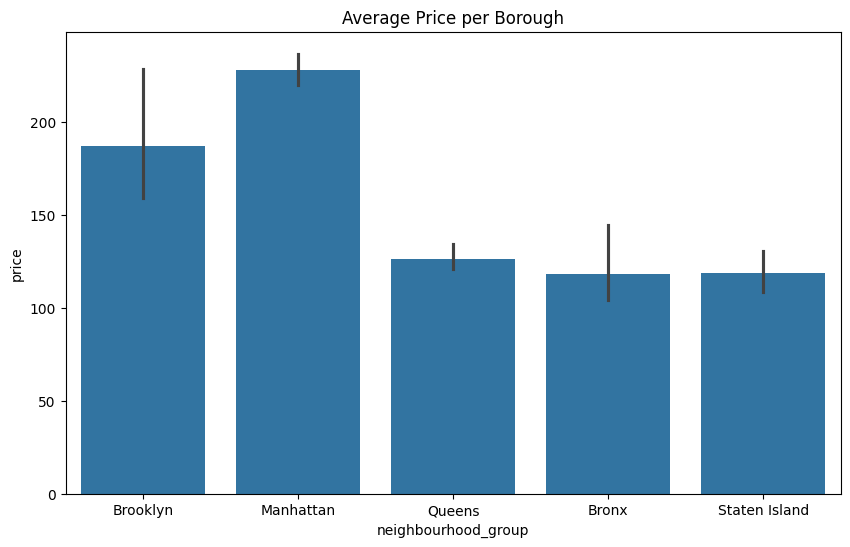

In [90]:
# Average price per borough
plt.figure(figsize=(10, 6))
sns.barplot(data=listings, x='neighbourhood_group', y='price')
plt.title('Average Price per Borough')
plt.show()

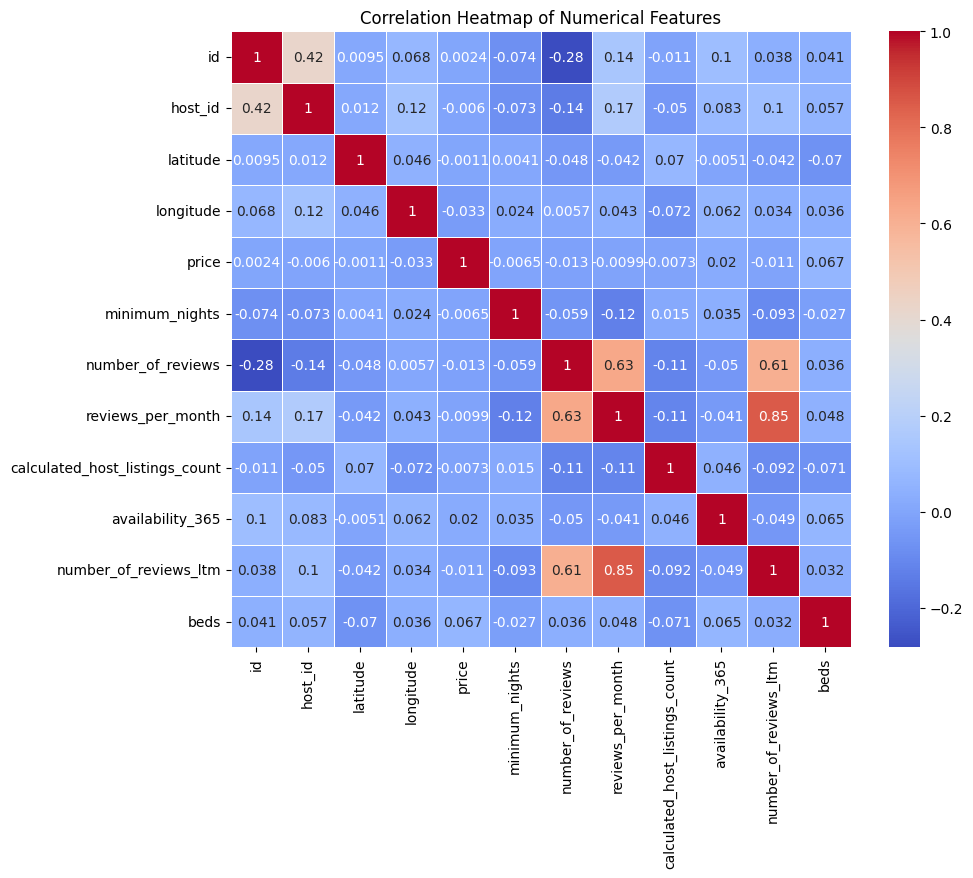

In [91]:
# Correlation heatmap of numerical features
numeric_columns = listings.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Step 3: Data Preprocessing

In [92]:
# Drop unnecessary columns
listings.drop(columns=['id', 'host_id', 'name', 'host_name', 'latitude', 'longitude', 'neighbourhood', 'license', 'last_review'], inplace=True)

# Convert non-numeric values to NaN and fill NaN values
for column in ['rating', 'bedrooms', 'baths', 'number_of_reviews']:
    listings[column] = pd.to_numeric(listings[column], errors='coerce').fillna(0)

# Encode room_type
room_type_encoding = pd.get_dummies(listings['room_type'], dtype='int')
listings = listings.drop('room_type', axis=1).join(room_type_encoding)

# Split features and target
X = listings.drop(['neighbourhood_group'], axis=1)
y = listings['neighbourhood_group'].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
# Look at the datafram after preprocessing
listings

,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths,Entire home/apt,Hotel room,Private room,Shared room
0,Brooklyn,55.0,30,3,0.03,1,0,0,5.00,1.0,1,0.0,0,0,1,0
1,Manhattan,144.0,30,9,0.24,139,364,2,4.67,2.0,1,1.0,1,0,0,0
2,Manhattan,187.0,2,6,1.67,1,343,6,4.17,1.0,2,1.0,1,0,0,0
3,Manhattan,120.0,30,156,1.38,2,363,12,4.64,1.0,1,1.0,0,0,1,0
4,Manhattan,85.0,30,11,0.24,133,335,3,4.91,0.0,1,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Manhattan,45.0,30,124,1.81,1,157,12,4.75,1.0,1,1.0,0,0,1,0
20754,Manhattan,105.0,30,56,0.48,1,0,1,4.46,1.0,2,1.0,1,0,0,0
20755,Manhattan,299.0,30,60,2.09,1,0,27,4.93,1.0,1,1.0,1,0,0,0
20756,Manhattan,115.0,30,7,0.91,1,363,7,5.00,1.0,1,1.0,1,0,0,0


Step 4: Model Training and Evaluation

- Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes doesn't have hyperparameters to tune
# We'll initialize the classifier and proceed to fit the model directly
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
print("Naive Bayes model training complete.")

Naive Bayes model training complete.


- Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit grid search to the data
dt_grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


- Random Forest

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning using RandomizedSearchCV with Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,  # number of parameter settings sampled
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)
random_search.fit(X_train, y_train.ravel())

# Best model
print(f'Best parameters for Random Forest:: {random_search.best_params_}')

Best parameters for Random Forest:: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}


- Support Vector Machines (SVM)

In [96]:
from sklearn.svm import SVC

# Define hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize SVM classifier
svm_classifier = SVC()

# Perform grid search
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-2)

# Fit grid search to the data
svm_grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best parameters for SVM:", svm_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  20.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  24.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  14.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  11.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  13.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.5s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=  20.7s
[CV] END ....................C=1, gamma=scale, ke

- K-Nearest Neighbors (KNN)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Manhattan and Euclidean distances
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit grid search to the data
knn_grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best parameters for KNN:", knn_grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for KNN: {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


Naive Bayes - Cross Validation Accuracy: 0.0817618719889883
Decision Tree - Cross Validation Accuracy: 0.5284239504473504
Random Forest - Cross Validation Accuracy: 0.5836200963523744
SVM - Cross Validation Accuracy: 0.5508602890571231
KNN - Cross Validation Accuracy: 0.5049552649690296


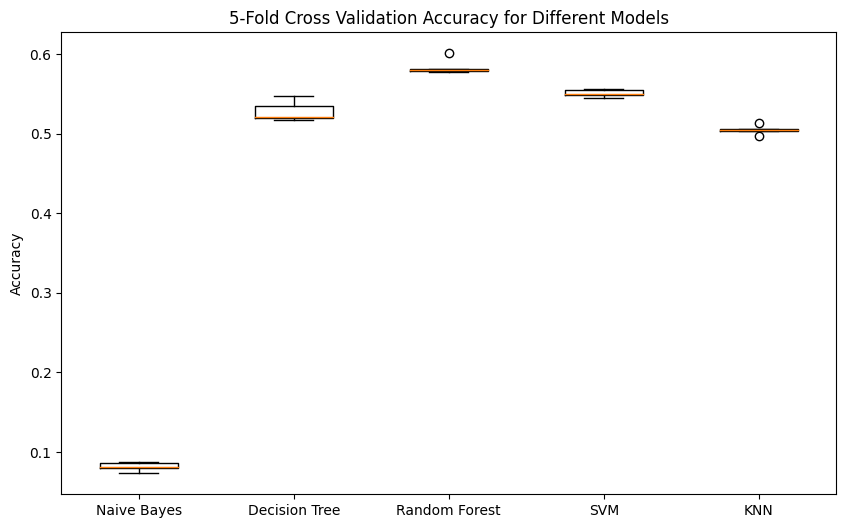

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Update Decision Tree with best hyperparameters
dt_best_params = dt_grid_search.best_params_
dt_classifier = DecisionTreeClassifier(**dt_best_params)

# Update Random Forest with best hyperparameters
rf_best_params = random_search.best_params_
rf_classifier = RandomForestClassifier(**rf_best_params)

# Update SVM with best hyperparameters
svm_best_params = svm_grid_search.best_params_
svm_classifier = SVC(**svm_best_params)

# Update KNN with best hyperparameters
knn_best_params = knn_grid_search.best_params_
knn_classifier = KNeighborsClassifier(**knn_best_params)

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'KNN': knn_classifier
}

# Perform 5-fold cross validation
cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f'{model_name} - Cross Validation Accuracy: {np.mean(cv_scores)}')

# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title('5-Fold Cross Validation Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.show()


Step 5: Model Comparison and Visualization

Naive Bayes Classification Report:
                precision    recall  f1-score   support

        Bronx       0.06      0.53      0.10       285
     Brooklyn       0.11      0.01      0.02      2316
    Manhattan       0.71      0.10      0.18      2412
       Queens       0.16      0.02      0.04      1128
Staten Island       0.02      0.62      0.04        87

     accuracy                           0.08      6228
    macro avg       0.21      0.26      0.07      6228
 weighted avg       0.35      0.08      0.09      6228

Decision Tree Classification Report:
                precision    recall  f1-score   support

        Bronx       0.18      0.05      0.07       285
     Brooklyn       0.46      0.72      0.57      2316
    Manhattan       0.68      0.57      0.62      2412
       Queens       0.44      0.20      0.28      1128
Staten Island       1.00      0.03      0.07        87

     accuracy                           0.53      6228
    macro avg       0.55      0.32      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

SVM Classification Report:
                precision    recall  f1-score   support

        Bronx       0.00      0.00      0.00       285
     Brooklyn       0.46      0.81      0.59      2316
    Manhattan       0.71      0.59      0.64      2412
       Queens       0.51      0.08      0.14      1128
Staten Island       0.00      0.00      0.00        87

     accuracy                           0.54      6228
    macro avg       0.34      0.30      0.27      6228
 weighted avg       0.54      0.54      0.49      6228

KNN Classification Report:
                precision    recall  f1-score   support

        Bronx       0.15      0.06      0.09       285
     Brooklyn       0.48      0.58      0.52      2316
    Manhattan       0.62      0.58      0.60      2412
       Queens       0.37      0.33      0.35      1128
Staten Island       0.13      0.02      0.04        87

     accuracy                           0.50      6228
    macro avg       0.35      0.32      0.32      6228
 wei

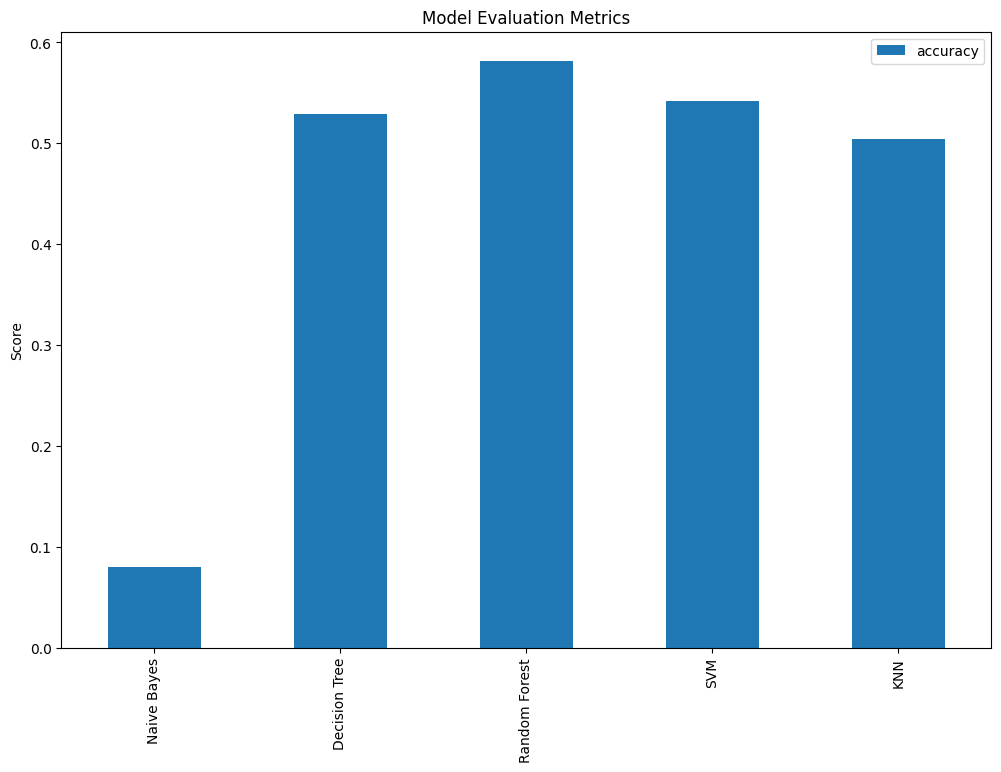

In [100]:
from sklearn.metrics import classification_report

# Store evaluation metrics
evaluation_metrics = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    evaluation_metrics[model_name] = report
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))

# Plot evaluation metrics
metrics_df = pd.DataFrame(evaluation_metrics).T[['accuracy', 'weighted avg']]
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

**Best Model: Random Forest**



In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pickle

# Read the data
listings = pd.read_csv('/content/new_york_listings_2024.csv')

# Drop unnecessary columns
listings.drop(columns=['id', 'host_id', 'name', 'host_name', 'latitude', 'longitude', 'neighbourhood', 'license', 'last_review'], inplace=True)

# Convert non-numeric values to NaN and fill NaN values
for column in ['rating', 'bedrooms', 'baths', 'number_of_reviews']:
    listings[column] = pd.to_numeric(listings[column], errors='coerce').fillna(0)

# Encode room_type
room_type_encoding = pd.get_dummies(listings['room_type'], dtype='int')
listings = listings.drop('room_type', axis=1).join(room_type_encoding)

# Remove Bronx and Staten Island from the dataset
listings = listings[~listings['neighbourhood_group'].isin(['Bronx', 'Staten Island'])]

# Split features and target
X = listings.drop(['neighbourhood_group'], axis=1)
y = listings['neighbourhood_group'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter tuning using RandomizedSearchCV with Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,  # number of parameter settings sampled
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)
random_search.fit(X_train, y_train.ravel())

# Best model
best_rf = random_search.best_estimator_
print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validated accuracy: {random_search.best_score_}')

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')

# Classification report and confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
with open('airbnb_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best cross-validated accuracy: 0.610965430380486
Test accuracy: 0.624146174863388
[[1734  437  145]
 [ 725 1626   61]
 [ 668  165  295]]
              precision    recall  f1-score   support

    Brooklyn       0.55      0.75      0.64      2316
   Manhattan       0.73      0.67      0.70      2412
      Queens       0.59      0.26      0.36      1128

    accuracy                           0.62      5856
   macro avg       0.62      0.56      0.57      5856
weighted avg       0.63      0.62      0.61      5856

